In [ ]:
# --- PAS 1: CONFIGURACIÓ DE L'ENTORN I CÀRREGA DE DADES ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from google.colab import drive

# Configuració estètica dels gràfics
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100 # Alta resolució per a la memòria

# 1. Muntar Google Drive
drive.mount('/content/drive')

# 2. Càrrega del Dataset
file_path = '/content/drive/MyDrive/TFG/Fase5/Dades_experiment_TFG.csv'

try:
    df = pd.read_csv(file_path)
    print("✅ ARXIU CARREGAT AMB ÈXIT")
    print(f"Mostra total: {len(df)} participants")

    # Mostrem les primeres 3 files per verificar l'estructura
    display(df.head(3))

except FileNotFoundError:
    print("❌ ERROR: No s'ha trobat el fitxer.")
    print("Si us plau, verifica que la ruta.")

Mounted at /content/drive
✅ ARXIU CARREGAT AMB ÈXIT
Mostra total: 139 participants


,timestamp,id_participant,grup_experimental,s2_edat,s2_sexe,s2_estudis,s2_ideologia,s2_likert_educacio1,s2_likert_educacio2,s2_likert_immi1,s2_likert_immi2,s4_comprensio,s4_percep_claredat,s4_percep_confianca,s4_percep_paraules,s4_post_item1,s4_post_item2,s5_record_tema,s5_record_visual
0,20/11/2025 17:24:56,1763637828648,A1,26,dona,secundaris,6,4,4,4,4,2021,4,4,"Malbaratament, subinversió",4,5,estable,res
1,20/11/2025 17:26:19,1763637849327,A1,33,home,postgrau,3,1,1,1,1,2020,1,1,Normal,1,6,poca variació,pocs pics
2,20/11/2025 17:45:37,1763656341940,B2,33,home,secundaris,6,4,4,4,4,uniforme,4,4,preocupant,4,3,Molta inmigració,Els colors


In [ ]:
# Codi ràpid per omplir el text de la memòria
# Intro 5.0
print(f"Edat Mitjana: {df['s2_edat'].mean():.1f} (SD={df['s2_edat'].std():.1f})")
print(f"% Dones: {(df['s2_sexe']=='dona').mean()*100:.1f}%")
print(f"% Estudis Superiors/Postgrau: {df['s2_estudis'].isin(['superiors', 'postgrau']).mean()*100:.1f}%")
print(f"Ideologia Mitjana (1-10): {pd.to_numeric(df['s2_ideologia'], errors='coerce').mean():.1f}")

Edat Mitjana: 41.3 (SD=14.5)
% Dones: 58.3%
% Estudis Superiors/Postgrau: 60.4%
Ideologia Mitjana (1-10): 3.7


In [ ]:
import pandas as pd

# 1. Convertim a numèric i transformem els errors ("NSC") en NaN
df['s2_edat'] = pd.to_numeric(df['s2_edat'], errors='coerce')
df['s2_ideologia'] = pd.to_numeric(df['s2_ideologia'], errors='coerce')

# 2. Comprovem quants valors s'han perdut (per saber quants NSC teníem)
print("Valors nuls (NSC) a Edat:", df['s2_edat'].isna().sum())
print("Valors nuls (NSC) a Ideologia:", df['s2_ideologia'].isna().sum())
print("-" * 30)

# 3. Ara sí, calculem les mitjanes per grup (els NaN s'ignoren automàticament)
print("HOMOGENEÏTAT DELS GRUPS (Mitjanes):")
print(df.groupby('grup_experimental')[['s2_edat', 's2_ideologia']].mean().round(2))

Valors nuls (NSC) a Edat: 0
Valors nuls (NSC) a Ideologia: 15
------------------------------
HOMOGENEÏTAT DELS GRUPS (Mitjanes):
                   s2_edat  s2_ideologia
grup_experimental                       
A1                   40.44          3.18
A2                   42.94          4.21
B1                   44.95          3.85
B2                   37.38          3.42


In [ ]:
import pandas as pd
import numpy as np

# Taula intro 5

print(">>> DADES PER A LA TAULA 5.0 <<<")
print(f"Total N: {len(df)}")

# 1. GÈNERE
counts_genere = df['s2_sexe'].value_counts()
pct_genere = df['s2_sexe'].value_counts(normalize=True) * 100
print("\n--- GÈNERE ---")
for cat in counts_genere.index:
    print(f"{cat}: {counts_genere[cat]} ({pct_genere[cat]:.1f}%)")

# 2. EDAT
print("\n--- EDAT ---")
print(f"Mitjana: {df['s2_edat'].mean():.1f}")
print(f"Desviació Estàndard (SD): {df['s2_edat'].std():.1f}")
print(f"Mínim: {df['s2_edat'].min()}")
print(f"Màxim: {df['s2_edat'].max()}")

# 3. ESTUDIS
counts_est = df['s2_estudis'].value_counts()
pct_est = df['s2_estudis'].value_counts(normalize=True) * 100
print("\n--- ESTUDIS ---")
for cat in counts_est.index:
    print(f"{cat}: {counts_est[cat]} ({pct_est[cat]:.1f}%)")

# 4. IDEOLOGIA (Netegem 'NSC' per fer la mitjana)
ideo_nums = pd.to_numeric(df['s2_ideologia'], errors='coerce').dropna()
print("\n--- IDEOLOGIA (1-10) ---")
print(f"Mitjana: {ideo_nums.mean():.1f}")
print(f"Desviació Estàndard: {ideo_nums.std():.1f}")
print(f"Respostes vàlides: {len(ideo_nums)} (NSC exclosos)")

>>> DADES PER A LA TAULA 5.0 <<<
Total N: 139

--- GÈNERE ---
dona: 81 (58.3%)
home: 56 (40.3%)
pnc: 2 (1.4%)

--- EDAT ---
Mitjana: 41.3
Desviació Estàndard (SD): 14.5
Mínim: 18
Màxim: 78

--- ESTUDIS ---
secundaris: 52 (37.4%)
superiors: 49 (35.3%)
postgrau: 35 (25.2%)
sense_estudis: 3 (2.2%)

--- IDEOLOGIA (1-10) ---
Mitjana: 3.7
Desviació Estàndard: 2.5
Respostes vàlides: 124 (NSC exclosos)


In [ ]:
# 5.1
import pandas as pd
from scipy.stats import ttest_ind

# 1. DEFINIM LES RESPOSTES CORRECTES (Basat en els gràfics)
# Educació: El pic és clarament el 2020.
# Immigració: La concentració és a la costa/mediterrani (i Madrid, però l'opció visual clara sol ser costa).
# Ajusta 'costa' si la teva resposta correcta era una altra segons el mapa.
correct_answers = {
    'A1': '2020', 'B1': '2020',
    'A2': 'costa', 'B2': 'costa'
}

# Funció per avaluar l'encert
def check_encert(row):
    grup = row['grup_experimental']
    resposta = str(row['s4_comprensio']).lower()
    correcta = correct_answers.get(grup, '').lower()
    # Fem servir 'in' per ser permissius (ex: "a la costa" vs "costa")
    return 1 if correcta in resposta else 0

df['encert_comprensio'] = df.apply(check_encert, axis=1)

# 2. GENEREM LA TAULA RESUM
print(">>> TAULA 5.2: COMPRENSIÓ I PERCEPCIÓ <<<")
metrics = ['encert_comprensio', 's4_percep_claredat', 's4_percep_confianca']
# Convertim a numèric per si de cas
for m in metrics: df[m] = pd.to_numeric(df[m], errors='coerce')

resum = df.groupby('grup_experimental')[metrics].agg(['mean', 'std'])
print(resum)

# 3. TESTS D'HIPÒTESI (T-TEST)
print("\n>>> SIGNIFICACIÓ ESTADÍSTICA (p-value) <<<")
temes = [('Educació', 'A1', 'B1'), ('Immigració', 'A2', 'B2')]

for tema, gA, gB in temes:
    print(f"\n--- {tema} ({gA} vs {gB}) ---")
    subA = df[df['grup_experimental']==gA]
    subB = df[df['grup_experimental']==gB]

    for m in metrics:
        t_stat, p_val = ttest_ind(subA[m].dropna(), subB[m].dropna())
        sig = "**Significatiu**" if p_val < 0.05 else "No significatiu"
        print(f"{m}: p={p_val:.3f} ({sig})")

>>> TAULA 5.2: COMPRENSIÓ I PERCEPCIÓ <<<
                  encert_comprensio           s4_percep_claredat            \
                               mean       std               mean       std   
grup_experimental                                                            
A1                         0.500000  0.508001           5.625000  1.453583   
A2                         0.838710  0.373878           5.580645  1.607777   
B1                         0.756757  0.434959           6.000000  1.333333   
B2                         0.923077  0.269953           6.051282  1.296731   

                  s4_percep_confianca            
                                 mean       std  
grup_experimental                                
A1                           4.781250  1.361554  
A2                           5.096774  1.350428  
B1                           4.810811  1.506243  
B2                           5.384615  1.183558  

>>> SIGNIFICACIÓ ESTADÍSTICA (p-value) <<<

--- Educació (A1

/tmp/ipython-input-3348622679.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


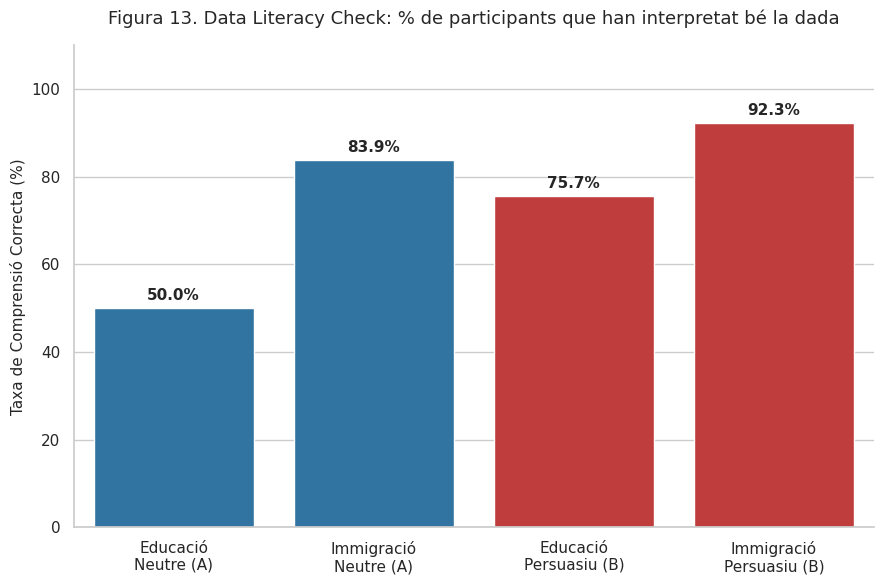

In [ ]:
# 5.1.1
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. DEFINIM QUÈ ÉS "CORRECTE"
# Segons el teu disseny:
# - Educació: La resposta correcta és l'any "2020" (el pic).
# - Immigració: La resposta correcta és "costa" (concentració costanera).

def evaluar_encert(row):
    grup = row['grup_experimental']
    resposta = str(row['s4_comprensio']).lower()

    if '1' in grup: # Educació (A1, B1)
        return 100 if '2020' in resposta else 0
    else: # Immigració (A2, B2)
        return 100 if 'costa' in resposta else 0

# Apliquem la lògica
df['Encert'] = df.apply(evaluar_encert, axis=1)

# 2. PREPARAR DADES PER AL GRÀFIC
# Agrupem per grup i calculem la mitjana (que serà el % d'encert)
resum_encert = df.groupby('grup_experimental')['Encert'].mean().reset_index()

# Afegim etiquetes maques
def get_label(g):
    if 'A1' in g: return 'Educació\nNeutre (A)'
    if 'B1' in g: return 'Educació\nPersuasiu (B)'
    if 'A2' in g: return 'Immigració\nNeutre (A)'
    if 'B2' in g: return 'Immigració\nPersuasiu (B)'

resum_encert['Etiqueta'] = resum_encert['grup_experimental'].apply(get_label)
resum_encert['Color'] = ['#1f77b4', '#1f77b4', '#d62728', '#d62728'] # Blau, Vermell... (Cal ordenar-ho bé)
# Per assegurar l'ordre A1, B1, A2, B2:
resum_encert['Color'] = resum_encert['grup_experimental'].map({
    'A1': '#1f77b4', 'B1': '#d62728',
    'A2': '#1f77b4', 'B2': '#d62728'
})

# 3. GENERAR EL GRÀFIC
plt.figure(figsize=(9, 6))
bars = sns.barplot(
    data=resum_encert,
    x='Etiqueta',
    y='Encert',
    palette=resum_encert.set_index('Etiqueta')['Color'].to_dict()
)

# Format
plt.ylim(0, 110)
plt.ylabel('Taxa de Comprensió Correcta (%)', fontsize=11)
plt.xlabel('')
plt.title('Figura 13. Data Literacy Check: % de participants que han interpretat bé la dada', fontsize=13, pad=15)

# Afegir els números a sobre les barres
for p in bars.patches:
    bars.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points',
                   fontweight='bold', fontsize=11)

sns.despine()
plt.tight_layout()
plt.show()

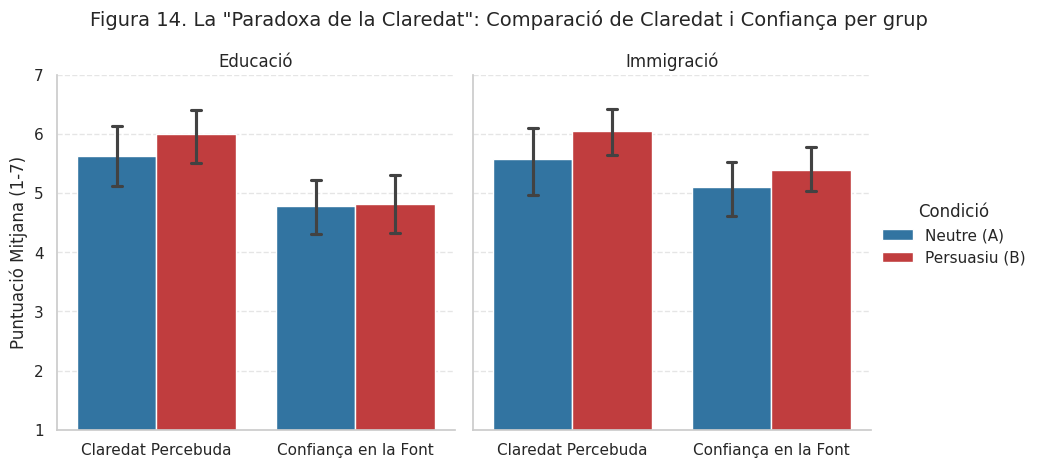

In [ ]:
# gràfic 5.1.2
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. PREPARACIÓ DE DADES (Format Llarg)
# Necessitem 'fondre' el dataframe per tenir una columna "Mètrica" (Claredat/Confiança)
df_long = pd.melt(
    df,
    id_vars=['grup_experimental'],
    value_vars=['s4_percep_claredat', 's4_percep_confianca'],
    var_name='Metrica_Raw',
    value_name='Puntuació'
)

# 2. Creem etiquetes boniques
def netejar_metrica(txt):
    if 'claredat' in txt: return 'Claredat Percebuda'
    if 'confianca' in txt: return 'Confiança en la Font'
    return txt

def definir_tema(grup):
    if '1' in grup: return 'Educació'
    return 'Immigració'

def definir_condicio(grup):
    if 'A' in grup: return 'Neutre (A)'
    return 'Persuasiu (B)'

df_long['Mètrica'] = df_long['Metrica_Raw'].apply(netejar_metrica)
df_long['Tema'] = df_long['grup_experimental'].apply(definir_tema)
df_long['Condició'] = df_long['grup_experimental'].apply(definir_condicio)

# 3. GENERAR EL GRÀFIC
# Fem servir 'catplot' per separar per Tema (Columnes) i Mètrica (Color/Barra)
# Però per fer-ho més net, farem un gràfic normal amb subplots o hue.

# Mètode Pro: FacetGrid per Tema
g = sns.catplot(
    data=df_long,
    kind="bar",
    x="Mètrica",
    y="Puntuació",
    hue="Condició",
    col="Tema",
    palette={'Neutre (A)': '#1f77b4', 'Persuasiu (B)': '#d62728'}, # Blau i Vermell
    height=5,
    aspect=0.9,
    capsize=.1, # Bigotis d'error
    errorbar=('ci', 95) # Interval de confiança del 95%
)

# 4. ESTIL I FORMAT
g.set_axis_labels("", "Puntuació Mitjana (1-7)")
g.set_titles("{col_name}") # Títol de cada requadre (Educació / Immigració)
g.set(ylim=(1, 7)) # Escala Likert real

# Afegir línia de quadrícula suau
for ax in g.axes.flat:
    ax.yaxis.grid(True, linestyle='--', alpha=0.5, color='#ccc')
    ax.set_axisbelow(True)

# Títol general
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Figura 14. La "Paradoxa de la Claredat": Comparació de Claredat i Confiança per grup', fontsize=14)

plt.show()
# g.savefig('Figura14_ClaredatConfianca.png', dpi=300)

/tmp/ipython-input-2223708888.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


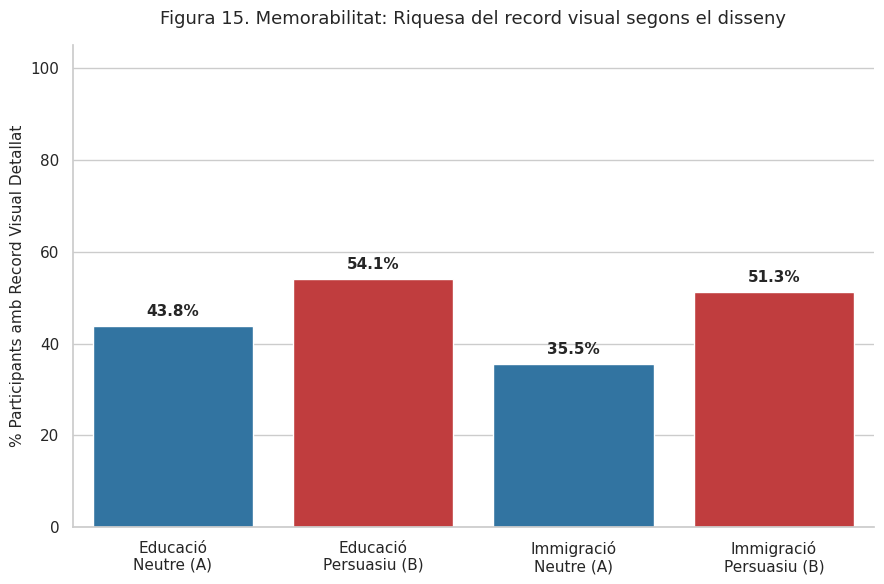

In [ ]:
#5.1.3

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. DEFINIR EL DICCIONARI DE PARAULES CLAU (Exactament el del text)
keywords_visuals = [
    # Atributs cromàtics
    'vermell', 'rojo', 'grana', 'fosc', 'intens', 'blau', 'azul', 'color',
    # Atributs morfològics
    'pic', 'pico', 'pujada', 'subida', 'baixada', 'bajada', 'corba', 'curva', 'pendent', 'pendiente', 'línia', 'linea',
    # Atributs Espacials i Estructurals
    'taca', 'mancha', 'zona', 'costa', 'mapa', 'fletxa', 'flecha'
]

# 2. FUNCIÓ DE CODIFICACIÓ AUTOMÀTICA
def codificar_memoria(row):
    # Convertim la resposta a text i minúscules per evitar errors
    text = str(row['s5_record_visual']).lower()

    # Busquem si ALGUNA de les paraules clau està dins del text
    # Si hi és, li donem un 100 (Record Detallat). Si no, un 0.
    if any(keyword in text for keyword in keywords_visuals):
        return 100
    else:
        return 0

# Apliquem la funció a cada fila del dataframe
df['Record_Visual_Score'] = df.apply(codificar_memoria, axis=1)

# 3. PREPARAR DADES PER AL GRÀFIC
# Agrupem per grup experimental i calculem la mitjana del score
resum_memoria = df.groupby('grup_experimental')['Record_Visual_Score'].mean().reset_index()

# Afegim etiquetes descriptives per a l'eix X
def get_label(g):
    if 'A1' in g: return 'Educació\nNeutre (A)'
    if 'B1' in g: return 'Educació\nPersuasiu (B)'
    if 'A2' in g: return 'Immigració\nNeutre (A)'
    if 'B2' in g: return 'Immigració\nPersuasiu (B)'

resum_memoria['Etiqueta'] = resum_memoria['grup_experimental'].apply(get_label)

# Ordenem els grups lògicament: A1, B1, A2, B2
ordre = ['A1', 'B1', 'A2', 'B2']
resum_memoria['grup_experimental'] = pd.Categorical(resum_memoria['grup_experimental'], categories=ordre, ordered=True)
resum_memoria = resum_memoria.sort_values('grup_experimental')

# Definim els colors: Blau per Neutre, Vermell per Persuasiu
colors = {'A1': '#1f77b4', 'B1': '#d62728', 'A2': '#1f77b4', 'B2': '#d62728'}

# 4. GENERAR EL GRÀFIC DE BARRES
plt.figure(figsize=(9, 6))
bars = sns.barplot(
    data=resum_memoria,
    x='Etiqueta',
    y='Record_Visual_Score',
    palette=[colors[g] for g in resum_memoria['grup_experimental']]
)

# Format i Estil
plt.ylim(0, 105) # Eix Y de 0 a 100%
plt.ylabel('% Participants amb Record Visual Detallat', fontsize=11)
plt.xlabel('')
plt.title('Figura 15. Memorabilitat: Riquesa del record visual segons el disseny', fontsize=13, pad=15)

# Afegir els percentatges a sobre de les barres
for p in bars.patches:
    bars.annotate(f'{p.get_height():.1f}%',
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'bottom',
                   fontweight='bold', fontsize=11, xytext=(0, 5), textcoords='offset points')

sns.despine() # Treure les vores innecessàries
plt.tight_layout()
plt.show()

In [ ]:
# 5.1.4
# --- 1. SEPARACIÓ I CÀLCUL DE DELTAS ---

# Subconjunt EDUCACIÓ (A1 = Control, B1 = Persuasiu)
df_edu = df[df['grup_experimental'].isin(['A1', 'B1'])].copy()
# Delta Educació: Post (Item 1) - Pre (Educacio 1)
df_edu['delta'] = df_edu['s4_post_item1'] - df_edu['s2_likert_educacio1']

# Subconjunt IMMIGRACIÓ (A2 = Control, B2 = Persuasiu)
df_immi = df[df['grup_experimental'].isin(['A2', 'B2'])].copy()
# Delta Immigració: Post (Item 2) - Pre (Immi 2) -> Usem Item 2 que és el de "Saturació/Problemes"
df_immi['delta'] = df_immi['s4_post_item2'] - df_immi['s2_likert_immi2']

# --- 2. FUNCIÓ ESTADÍSTICA (WELCH + COHEN) ---

def calcular_estadistiques(df_sub, grup_control, grup_persuasiu, tema):
    # Filtrar dades per grup
    data_control = df_sub[df_sub['grup_experimental'] == grup_control]['delta']
    data_persuasiu = df_sub[df_sub['grup_experimental'] == grup_persuasiu]['delta']

    # N, Mitjana i Desviació Estàndard
    n_c, mean_c, std_c = len(data_control), data_control.mean(), data_control.std()
    n_p, mean_p, std_p = len(data_persuasiu), data_persuasiu.mean(), data_persuasiu.std()

    # Test t de Welch (equal_var=False)
    t_stat, p_val = stats.ttest_ind(data_control, data_persuasiu, equal_var=False)

    # d de Cohen (Pooled SD per a grandàries mostrals similars)
    # Fórmula: (Mean1 - Mean2) / SD_pooled
    sd_pooled = np.sqrt(((n_c - 1) * std_c**2 + (n_p - 1) * std_p**2) / (n_c + n_p - 2))
    d_cohen = (mean_p - mean_c) / sd_pooled

    # Interpretar significació
    sig = "*" if p_val < 0.05 else "n.s."

    return {
        'Temàtica': tema,
        'Contrast': f"{grup_control} vs {grup_persuasiu}",
        'N (A/B)': f"{n_c} / {n_p}",
        'Mitjana Delta A (SD)': f"{mean_c:.2f} ({std_c:.2f})",
        'Mitjana Delta B (SD)': f"{mean_p:.2f} ({std_p:.2f})",
        't Welch': f"{t_stat:.2f}",
        'p-valor': f"{p_val:.3f} {sig}",
        'd Cohen': f"{d_cohen:.2f}"
    }

# --- 3. EXECUTAR I CREAR TAULA ---

fila_edu = calcular_estadistiques(df_edu, 'A1', 'B1', 'Educació')
fila_immi = calcular_estadistiques(df_immi, 'A2', 'B2', 'Immigració')

# Crear DataFrame final per a la memòria
taula_6 = pd.DataFrame([fila_edu, fila_immi])

# Mostrar resultat
print("--- TAULA 6: RESULTATS DELTA I INFERÈNCIA ---")
display(taula_6)

# Opcional: imprimir els valors per copiar al text
print("\n--- RESUM TEXTUAL ---")
print(f"EDUCACIÓ: t={fila_edu['t Welch']}, p={fila_edu['p-valor']}, d={fila_edu['d Cohen']}")
print(f"IMMIGRACIÓ: t={fila_immi['t Welch']}, p={fila_immi['p-valor']}, d={fila_immi['d Cohen']}")

--- TAULA 6: RESULTATS DELTA I INFERÈNCIA ---


,Temàtica,Contrast,N (A/B),Mitjana Delta A (SD),Mitjana Delta B (SD),t Welch,p-valor,d Cohen
0,Educació,A1 vs B1,32 / 37,-0.81 (1.31),-0.03 (0.76),-2.99,0.004 *,0.75
1,Immigració,A2 vs B2,31 / 39,0.16 (1.61),0.31 (1.38),-0.40,0.689 n.s.,0.10



--- RESUM TEXTUAL ---
EDUCACIÓ: t=-2.99, p=0.004 *, d=0.75
IMMIGRACIÓ: t=-0.40, p=0.689 n.s., d=0.10


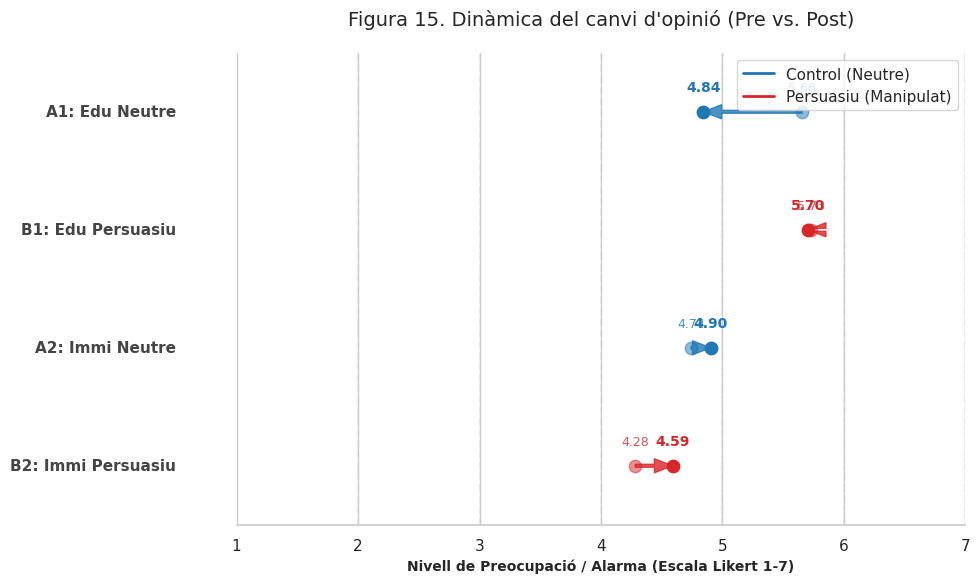

In [ ]:
# 5.3 arrow plot
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. PREPARACIÓ DE DADES (Mitjanes per grup)
# Funció per extreure les mitjanes pre i post de cada grup
def get_means(grup_code, col_pre, col_post, label):
    subset = df[df['grup_experimental'] == grup_code]
    return {
        'grup': label,
        'pre': subset[col_pre].mean(),
        'post': subset[col_post].mean(),
        'color': '#d62728' if 'B' in grup_code else '#1f77b4' # Vermell si és Persuasiu, Blau si és Control
    }

# Definim els 4 grups i les seves columnes corresponents
# NOTA: Assegura't que 's4_post_item1' i 's4_post_item2' són les columnes correctes al teu df
dades_plot = [
    get_means('A1', 's2_likert_educacio1', 's4_post_item1', 'A1: Edu Neutre'),
    get_means('B1', 's2_likert_educacio1', 's4_post_item1', 'B1: Edu Persuasiu'),
    get_means('A2', 's2_likert_immi2',     's4_post_item2', 'A2: Immi Neutre'),
    get_means('B2', 's2_likert_immi2',     's4_post_item2', 'B2: Immi Persuasiu')
]

df_plot = pd.DataFrame(dades_plot)

# 2. GENERACIÓ DEL GRÀFIC
fig, ax = plt.subplots(figsize=(10, 6))

# Posicions verticals per a cada línia (per separar-les bé)
y_positions = [3.5, 2.5, 1.5, 0.5]

for i, row in df_plot.iterrows():
    y = y_positions[i]
    color = row['color']

    # A. Dibuixar la fletxa (del Pre al Post)
    # length_includes_head=True fa que la punta acabi exactament al valor 'post'
    ax.arrow(row['pre'], y, row['post'] - row['pre'], 0,
             head_width=0.12, head_length=0.15, fc=color, ec=color,
             length_includes_head=True, width=0.025, alpha=0.8)

    # B. Dibuixar els punts (Cua i Punta)
    ax.scatter(row['pre'], y, color=color, s=80, alpha=0.5, label='_nolegend_') # Cua (semitransparent)
    ax.scatter(row['post'], y, color=color, s=80, label='_nolegend_')          # Punta (sòlid)

    # C. Afegir etiquetes de text amb els valors
    # Valor Pre (a sobre)
    ax.text(row['pre'], y + 0.15, f"{row['pre']:.2f}", ha='center', va='bottom',
            color=color, fontsize=9, alpha=0.8)
    # Valor Post (a sobre, en negreta)
    ax.text(row['post'], y + 0.15, f"{row['post']:.2f}", ha='center', va='bottom',
            color=color, fontsize=10, fontweight='bold')

    # D. Etiqueta del grup a l'esquerra
    ax.text(0.5, y, row['grup'], ha='right', va='center',
            fontsize=11, fontweight='bold', color='#444')

# 3. FORMAT I ESTIL
ax.set_xlim(1, 7)  # Escala Likert de 1 a 7
ax.set_ylim(0, 4)
ax.set_yticks([])  # Amagar eix Y
ax.set_xlabel('Nivell de Preocupació / Alarma (Escala Likert 1-7)', fontsize=10, fontweight='bold')
ax.set_title('Figura 15. Dinàmica del canvi d\'opinió (Pre vs. Post)', fontsize=14, pad=20)

# Línies verticals de fons
for x in range(1, 8):
    ax.axvline(x, color='#eeeeee', zorder=0, linestyle='--')

# Llegenda manual per explicar els colors
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='#1f77b4', lw=2),
                Line2D([0], [0], color='#d62728', lw=2)]
ax.legend(custom_lines, ['Control (Neutre)', 'Persuasiu (Manipulat)'], loc='upper right', frameon=True)

# Eliminar vores innecessàries
sns.despine(left=True, bottom=False)

plt.tight_layout()
plt.show()

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

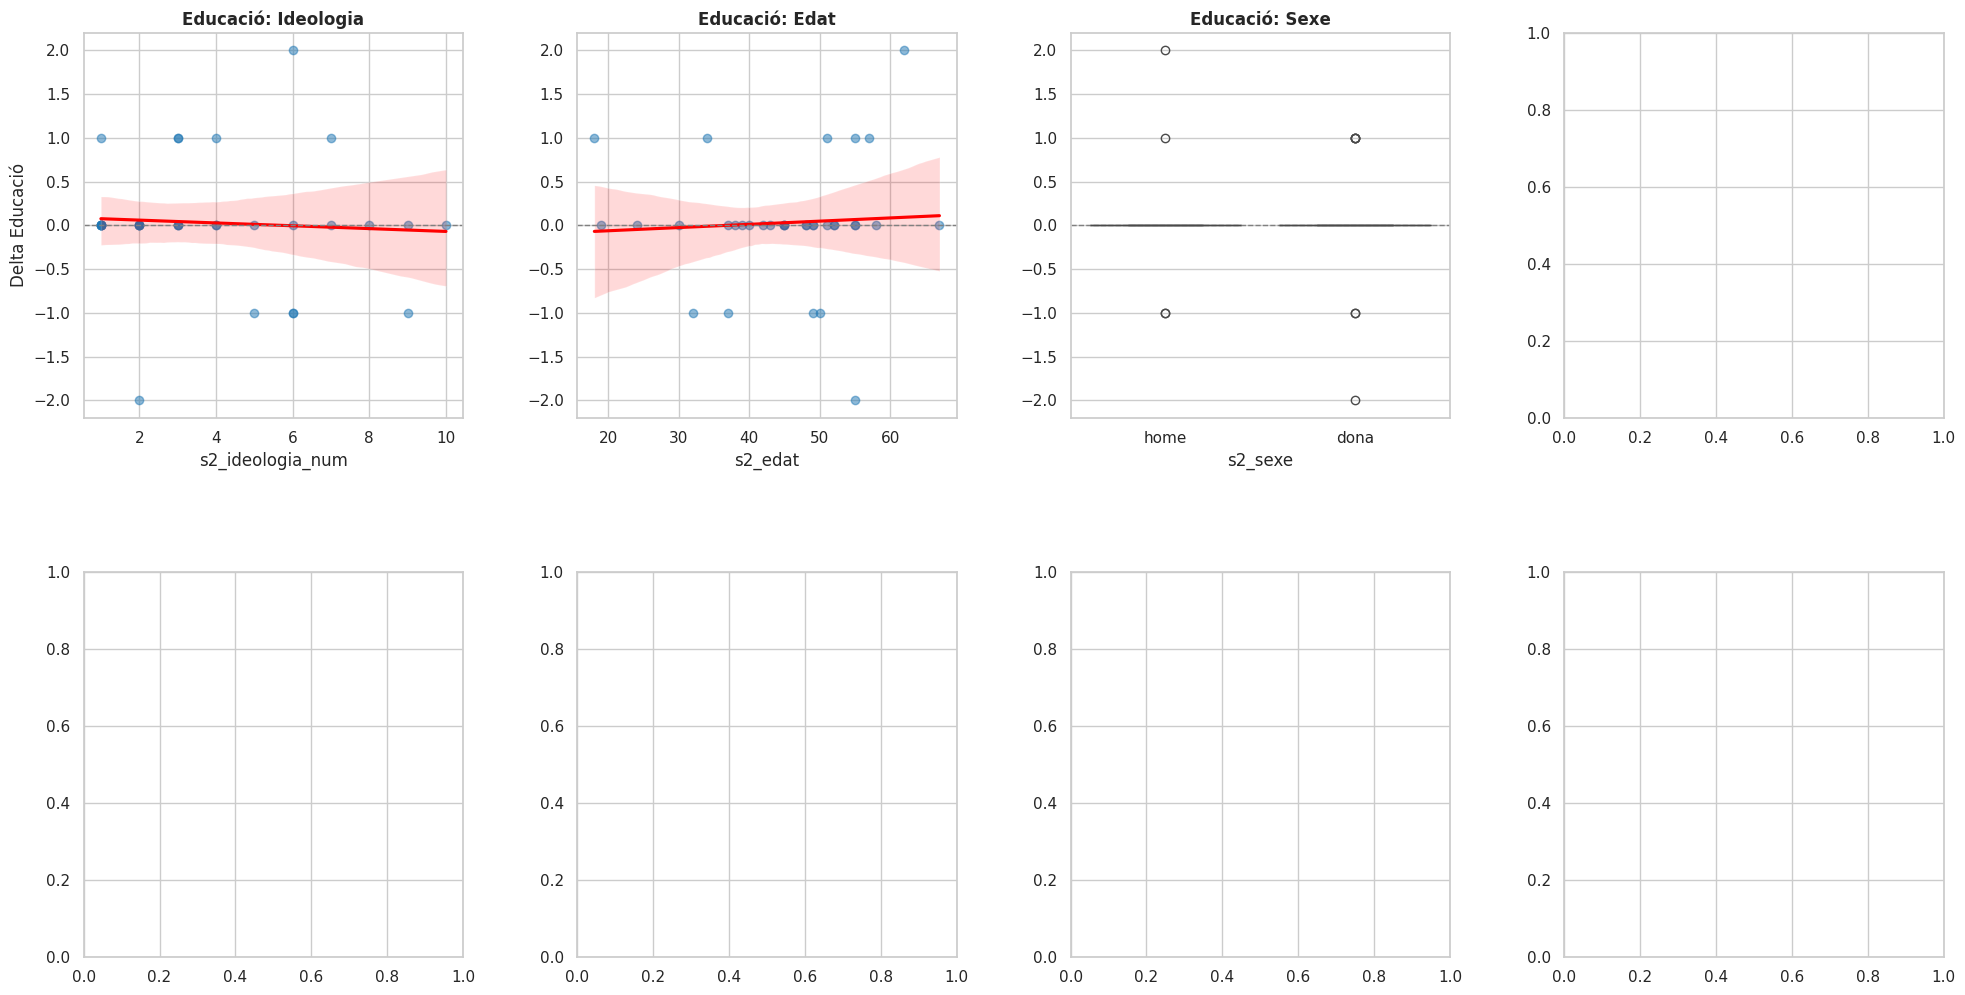

In [ ]:
# 5.1.5
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# --- 1. PREPARACIÓ DE DADES ---
# Assegurem que les variables siguin numèriques
cols_a_netejar = ['s4_post_item1', 's2_likert_educacio1', 's4_post_item2', 's2_likert_immi2', 's2_ideologia', 's2_edat']
for col in cols_a_netejar:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Creem les columnes específiques
df['s2_ideologia_num'] = df['s2_ideologia']
df['Delta_Educacio'] = df['s4_post_item1'] - df['s2_likert_educacio1']
df['Delta_Immigracio'] = df['s4_post_item2'] - df['s2_likert_immi2']

# Netegem espais als noms dels grups
df['grup_experimental'] = df['grup_experimental'].astype(str).str.strip()

# --- 2. CONFIGURACIÓ DE LA FIGURA ---
fig, ax = plt.subplots(2, 4, figsize=(24, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Dades filtrades només per als grups PERSUASIUS
# Eliminem NaNs per evitar errors de plot
df_B1 = df[df['grup_experimental'] == 'B1'].copy().dropna(subset=['s2_ideologia_num', 's2_edat', 's2_sexe', 's2_estudis', 'Delta_Educacio'])
df_B2 = df[df['grup_experimental'] == 'B2'].copy().dropna(subset=['s2_ideologia_num', 's2_edat', 's2_sexe', 's2_estudis', 'Delta_Immigracio'])

# Ordre teòric desitjat
ordre_teoric = ['Bàsics', 'Secundaris', 'Superiors', 'Postgrau']

# --- FILA 1: CAS EDUCACIÓ (B1) ---

# 1. Ideologia
sns.regplot(x='s2_ideologia_num', y='Delta_Educacio', data=df_B1, ax=ax[0,0],
            scatter_kws={'color':'#1f77b4', 'alpha':0.5}, line_kws={'color':'red'})
ax[0,0].set_title('Educació: Ideologia', fontweight='bold')
ax[0,0].set_ylabel('Delta Educació')
ax[0,0].axhline(0, color='grey', linestyle='--', linewidth=1)

# 2. Edat
sns.regplot(x='s2_edat', y='Delta_Educacio', data=df_B1, ax=ax[0,1],
            scatter_kws={'color':'#1f77b4', 'alpha':0.5}, line_kws={'color':'red'})
ax[0,1].set_title('Educació: Edat', fontweight='bold')
ax[0,1].set_ylabel('')
ax[0,1].axhline(0, color='grey', linestyle='--', linewidth=1)

# 3. Sexe
sns.boxplot(x='s2_sexe', y='Delta_Educacio', data=df_B1, ax=ax[0,2], palette='Blues', hue='s2_sexe', legend=False)
ax[0,2].set_title('Educació: Sexe', fontweight='bold')
ax[0,2].set_ylabel('')
ax[0,2].axhline(0, color='grey', linestyle='--', linewidth=1)

# 4. Estudis (CORRECCIÓ AQUÍ: Calculem l'ordre específic per a B1)
cats_B1 = df_B1['s2_estudis'].unique()
ordre_B1 = [x for x in ordre_teoric if x in cats_B1] # Només les que existeixen a B1

sns.boxplot(x='s2_estudis', y='Delta_Educacio', data=df_B1, order=ordre_B1, ax=ax[0,3], palette='Blues', hue='s2_estudis', legend=False)
ax[0,3].set_title('Educació: Estudis', fontweight='bold')
ax[0,3].set_ylabel('')
ax[0,3].tick_params(axis='x', rotation=45)
ax[0,3].axhline(0, color='grey', linestyle='--', linewidth=1)


# --- FILA 2: CAS IMMIGRACIÓ (B2) ---

# 1. Ideologia
sns.regplot(x='s2_ideologia_num', y='Delta_Immigracio', data=df_B2, ax=ax[1,0],
            scatter_kws={'color':'#c0392b', 'alpha':0.5}, line_kws={'color':'blue'})
ax[1,0].set_title('Immigració: Ideologia', fontweight='bold')
ax[1,0].set_ylabel('Delta Immigració')
ax[1,0].axhline(0, color='grey', linestyle='--', linewidth=1)

# 2. Edat
sns.regplot(x='s2_edat', y='Delta_Immigracio', data=df_B2, ax=ax[1,1],
            scatter_kws={'color':'#c0392b', 'alpha':0.5}, line_kws={'color':'blue'})
ax[1,1].set_title('Immigració: Edat', fontweight='bold')
ax[1,1].set_ylabel('')
ax[1,1].axhline(0, color='grey', linestyle='--', linewidth=1)

# 3. Sexe
sns.boxplot(x='s2_sexe', y='Delta_Immigracio', data=df_B2, ax=ax[1,2], palette='Reds', hue='s2_sexe', legend=False)
ax[1,2].set_title('Immigració: Sexe', fontweight='bold')
ax[1,2].set_ylabel('')
ax[1,2].axhline(0, color='grey', linestyle='--', linewidth=1)

# 4. Estudis (CORRECCIÓ AQUÍ: Calculem l'ordre específic per a B2)
cats_B2 = df_B2['s2_estudis'].unique()
ordre_B2 = [x for x in ordre_teoric if x in cats_B2] # Només les que existeixen a B2

sns.boxplot(x='s2_estudis', y='Delta_Immigracio', data=df_B2, order=ordre_B2, ax=ax[1,3], palette='Reds', hue='s2_estudis', legend=False)
ax[1,3].set_title('Immigració: Estudis', fontweight='bold')
ax[1,3].set_ylabel('')
ax[1,3].tick_params(axis='x', rotation=45)
ax[1,3].axhline(0, color='grey', linestyle='--', linewidth=1)

fig.suptitle('Figura 17. Anàlisi detallada de Covariables per tipus de manipulació', fontsize=16, y=0.95)
plt.show()